In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [237]:
x = np.linspace(-1,1,200)
y = np.linspace(0,3,200)
XX, YY = np.meshgrid(x,y)

def loss(X,Y):
    f = 1
    c1 = 10
    A = 1/(1+np.exp(-c1*(Y-f)))

    c2 = 0.1
    B = c2*Y

    A1 = 1
    c3 = 30
    mux = 0
    muy = 2.5
    C = -A1*np.exp(-c3*((X-mux)**2 + (Y-muy)**2))
    
    L = A+B+C

    gx = -2*c3*C*(X-mux)
    gy = c1*A**2*np.exp(-c1*(Y-f)) + c2 - 2*c3*C*(Y-muy)

    gxx = 2*c3*C*(2*c3*(X-mux)**2 - 1)
    gyy = c1**2*A**2*np.exp(-c1*(Y-f))*(-1+2*A*np.exp(-c1*(Y-f))) + 2*c3*C*(2*c3*(Y-muy)**2 - 1)
    gxy = 4*c3**2*C*(X-mux)*(Y-muy) #gyx = gxy

    return L, [gx,gy], [gxx,gyy,gxy]

In [238]:
points = [np.array([-0.01,2.9])]
heights = []

lr=0.1
m = 0.1

for n in range(6000):
    L, [gx,gy], [gxx,gyy,gxy] = loss(points[-1][0],points[-1][1])

    # points.append(points[-1] - lr*np.array([gx,gy]))
    # heights.append(L)

    grad = np.sqrt(gx**2 + gy**2)
    heights.append(L + m*grad)
    step = lr * (np.array([gx,gy]) + m/grad*np.array([gx,gy])@np.array([[gxx,gxy],[gxy,gyy]]))
    points.append(points[-1] - step)

pts = np.asarray(points)

(0.0, 3.0)

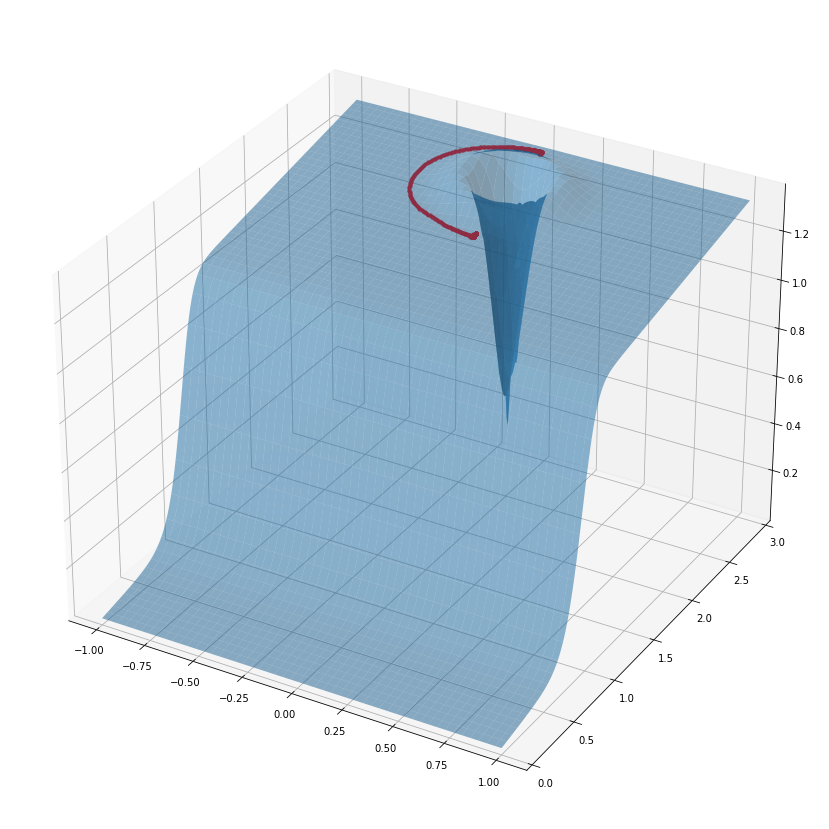

In [241]:
L, [gx,gy], [gxx,gyy,gxy] = loss(XX,YY)

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection="3d")

# ax.plot_surface(XX,YY,L,alpha=0.5)
ax.plot_surface(XX,YY,L + m * np.sqrt(gx**2 + gy**2),alpha=0.5)
ax.plot3D(pts[:-1,0],pts[:-1,1],heights,'r',marker=".")
ax.set_ylim(0,3)

# ax.plot_surface(XX,YY,np.sqrt(gx**2 + gy**2),alpha=0.5)
# ax.view_init(2.5,180)
# ax.view_init(10,0)

In [52]:
gx

array([[-4.30505758e-64, -7.76537125e-64, -1.39209443e-63, ...,
         1.39209443e-63,  7.76537125e-64,  4.30505758e-64],
       [-2.61021511e-63, -4.70825048e-63, -8.44045837e-63, ...,
         8.44045837e-63,  4.70825048e-63,  2.61021511e-63],
       [-1.56117500e-62, -2.81601424e-62, -5.04825541e-62, ...,
         5.04825541e-62,  2.81601424e-62,  1.56117500e-62],
       ...,
       [-3.12102034e-24, -5.62963008e-24, -1.00922112e-23, ...,
         1.00922112e-23,  5.62963008e-24,  3.12102034e-24],
       [-1.28928964e-24, -2.32559321e-24, -4.16907995e-24, ...,
         4.16907995e-24,  2.32559321e-24,  1.28928964e-24],
       [-5.25390646e-25, -9.47688466e-25, -1.69891663e-24, ...,
         1.69891663e-24,  9.47688466e-25,  5.25390646e-25]])

In [130]:
x = np.linspace(1e-2,2,200)
XX, YY = np.meshgrid(x,x)

def loss(XX,YY):
    r = np.sqrt(XX**2 + YY**2)

    c1 = 10
    f = 1

    tmp = np.exp(-(r-f)*c1)
    A = 1/(1+tmp)
    Amx = c1*A**2 * tmp * XX/r
    Amy = c1*A**2 * tmp * YY/r

    c2 = 0.1
    B = c2*r
    Bmx = c2*XX/r
    Bmy = c2*YY/r

    c3 = 30
    A1 = 1.1
    mu = 1.2
    C = -A1*np.exp(c3*(- (XX - mu)**2 - (YY - mu)**2))
    Cmx = -c3*C*2*(XX-mu)
    Cmy = -c3*C*2*(YY-mu)


    L = A+B+C
    grad = np.sqrt((Amx + Bmx + Cmx)**2 + (Amy + Bmy + Cmy)**2)
    return L, grad
ZZ,ZZ2 = loss(XX,YY)

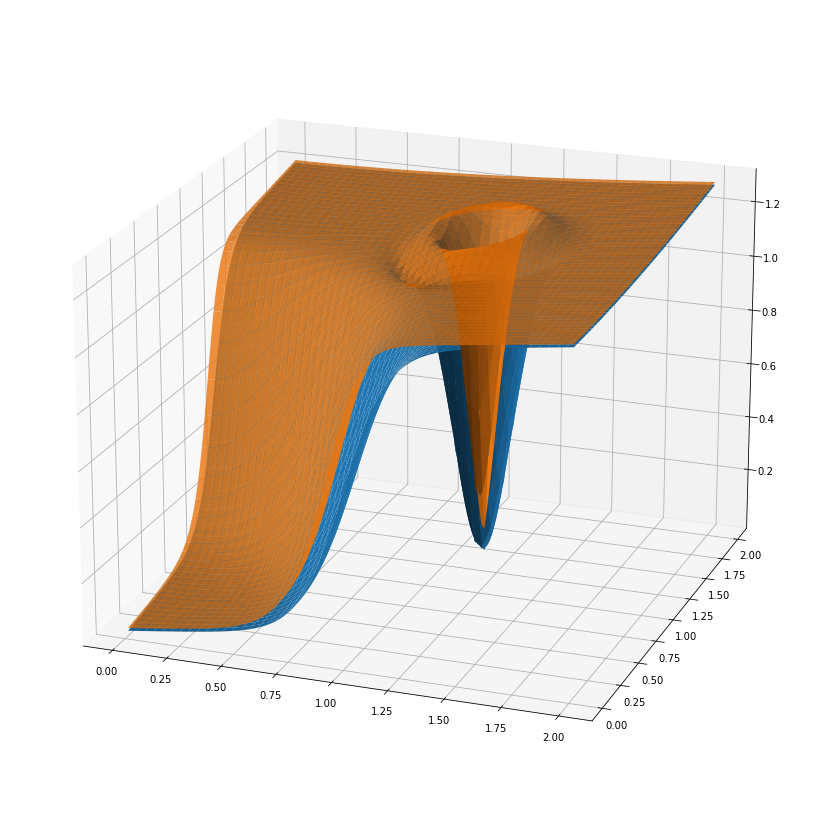

In [131]:
# %matplotlib inline
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection="3d")

ax.plot_surface(XX,YY,ZZ)
# ax.view_init(90,0)
ax.plot_surface(XX,YY,ZZ + 0.1*ZZ2,alpha=0.8)
# ax.contour3D(XX,YY,ZZ,100,cmap="binary")
# ax.contour3D(XX,YY,ZZ + 0.1*ZZ2,100,cmap="binary")
ax.view_init(20,225+65)

In [234]:
def f(y):
    points.append(y)
    XX = y[0]
    YY = y[1]
    r = np.sqrt(XX**2 + YY**2)

    c1 = 10
    f = 1

    tmp = np.exp(-(r-f)*c1)
    A = 1/(1+tmp)
    Amx = c1*A**2 * tmp * XX/r
    Amy = c1*A**2 * tmp * YY/r

    c2 = 0.1
    B = c2*r
    Bmx = c2*XX/r
    Bmy = c2*YY/r

    c3 = 30
    A1 = 1.2
    mu = 1.2
    C = -A1*np.exp(c3*(- (XX - mu)**2 - (YY - mu)**2))
    Cmx = -c3*C*2*(XX-mu)
    Cmy = -c3*C*2*(YY-mu)


    L = A+B+C
    grad = np.sqrt((Amx + Bmx + Cmx)**2 + (Amy + Bmy + Cmy)**2)
    return L,  np.array([Amx + Bmx + Cmx, Amy + Bmy + Cmy])

points = [np.array([1.02,1.9])]
lr=0.01
for n in range(1000):
    L, grad = f(points[-1])
    points.append(points[-1] - lr*grad)

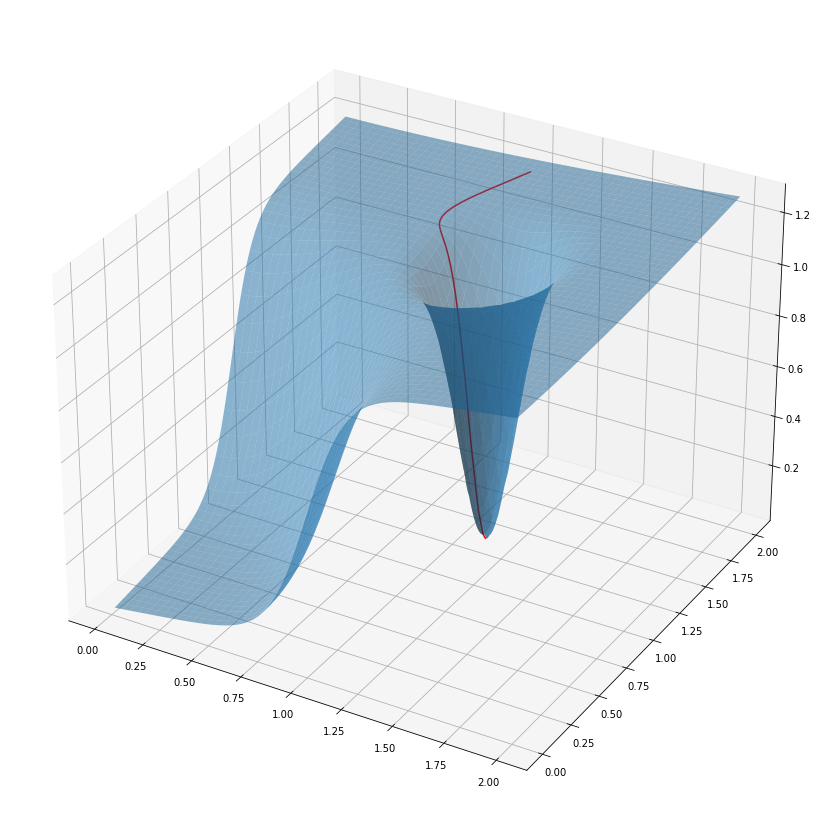

In [237]:
pts = np.asarray(points)

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection="3d")

ax.plot_surface(XX,YY,ZZ,alpha=0.5)
ax.plot3D(pts[:,0],pts[:,1],loss(pts[:,0],pts[:,1])[0],'r')

In [ ]:
m = 0.1
def f(y):
    points.append(y)
    XX = y[0]
    YY = y[1]
    r = np.sqrt(XX**2 + YY**2)

    c1 = 10
    f = 1

    tmp = np.exp(-(r-f)*c1)
    A = 1/(1+tmp)
    Amx = c1*A**2 * tmp * XX/r
    Amy = c1*A**2 * tmp * YY/r

    c2 = 0.1
    B = c2*r
    Bmx = c2*XX/r
    Bmy = c2*YY/r

    c3 = 30
    A1 = 1.2
    mu = 1.2
    C = -A1*np.exp(c3*(- (XX - mu)**2 - (YY - mu)**2))
    Cmx = -c3*C*2*(XX-mu)
    Cmy = -c3*C*2*(YY-mu)


    L = A+B+C
    grad = np.sqrt((Amx + Bmx + Cmx)**2 + (Amy + Bmy + Cmy)**2)
    return L + m*grad,  np.array([Amx + Bmx + Cmx, Amy + Bmy + Cmy])

points = [np.array([0.5,1.9])]
lr=0.01
for n in range(1000):
    L, grad = f(points[-1])
    points.append(points[-1] - lr*grad)